In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Estos datos nos muestra los asesinatos de Juegos de Tronos en cada temporada:
name:nombre de la víctima
allegiance: la alianza de la víctima
season: temporada

In [2]:
df = pd.read_csv('data/game_of_thrones.csv')
df.head(100)

,name,allegiance,season,episode,location,killer,killers_house,method,death_no
0,Waymar Royce,Night's Watch,1,1,Beyond the Wall,White Walker,NaN,Ice sword,1
1,Gared,Night's Watch,1,1,Beyond the Wall,White Walker,NaN,Ice sword,2
2,Will,Night's Watch,1,1,Winterfell,Ned Stark,House Stark,Sword,3
3,Stag,NaN,1,1,Winterfell,Direwolf,NaN,Teeth,4
4,Direwolf,NaN,1,1,Winterfell,Stag,NaN,Antler,5
...,...,...,...,...,...,...,...,...,...
95,The Spice King,The Thirteen,2,7,Qarth,Pyat Pree,Warlocks of Qarth,Knife,96
96,The Silk King,The Thirteen,2,7,Qarth,Pyat Pree,Warlocks of Qarth,Knife,97
97,The Copper King,The Thirteen,2,7,Qarth,Pyat Pree,Warlocks of Qarth,Knife,98
98,Member of the Thirteen,The Thirteen,2,7,Qarth,Pyat Pree,Warlocks of Qarth,Knife,99


Quiero saber los datos con NaN, si son string seran reemplazados como 'Desconocidos' y si son numéricos serán 0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2224 non-null   object
 1   allegiance     1792 non-null   object
 2   season         2224 non-null   int64 
 3   episode        2224 non-null   int64 
 4   location       2224 non-null   object
 5   killer         2214 non-null   object
 6   killers_house  2194 non-null   object
 7   method         2224 non-null   object
 8   death_no       2224 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 156.5+ KB


In [5]:
df_filtrado = df.fillna({"allegiance":'desconocido', 
                         "killer":'desconocido',
                         "killers_house":'desconocido'})
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2224 non-null   object
 1   allegiance     2224 non-null   object
 2   season         2224 non-null   int64 
 3   episode        2224 non-null   int64 
 4   location       2224 non-null   object
 5   killer         2224 non-null   object
 6   killers_house  2224 non-null   object
 7   method         2224 non-null   object
 8   death_no       2224 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 156.5+ KB


Queremos daber el número de muertes totales y el número de muertes de la 1ra temporada
Tambien quiero saber el impacto de muertes de la temp1 respecto al conjunto de asesinatos

In [24]:
total_muertos=df.shape[0] 
temp1_muertos=df[df.season==1].shape[0]
temp1_impacto=round(temp1_muertos*100/total_muertos,2)
print(f"El número de muertos total es {total_muertos}")
print(f"En la 1ra temporada se mueren {temp1_muertos}")
print(f"Entonces, el impacto de la 1ra es de {temp1_impacto}%")

El número de muertos total es 2224
En la 1ra temporada se mueren 58
Entonces, el impacto de la 1ra es de 2.61%


Recuperar los datos de muertes tambien de las temporadas 2 y 3, su impacto y realizar un diccionario y ponerlo en un DATAFRAME nuevo.

In [44]:
temp2_muertos=len(df.query("season==2"))
temp3_muertos=df.query("season==3").shape[0]
temp4_muertos=df[df.season==4].shape[0]
temp5_muertos=len(df.query("season==5"))
temp6_muertos=df.query("season==6").shape[0]
temp7_muertos=df[df.season==7].shape[0]
temp8_muertos=df[df.season==8].shape[0]

temp4_impacto=round(temp4_muertos*100/total_muertos,2)
temp2_impacto=round(temp2_muertos*100/total_muertos,2)
temp3_impacto=round(temp3_muertos*100/total_muertos,2)
temp5_impacto=round(temp5_muertos*100/total_muertos,2)
temp6_impacto=round(temp6_muertos*100/total_muertos,2)
temp7_impacto=round(temp7_muertos*100/total_muertos,2)
temp8_impacto=round(temp8_muertos*100/total_muertos,2)
data = {
    'Temporada':['Temp1', 'Temp2', 'Temp3','Temp4', 'Temp5', 'Temp6','Temp7']
    , 'NumMuertes':[temp1_muertos, temp2_muertos, temp3_muertos,temp4_muertos, temp5_muertos, temp6_muertos, temp7_muertos,temp8_muertos]
    , 'Impacto':[temp1_impacto, temp2_impacto, temp3_impacto, temp4_impacto, temp5_impacto, temp5_impacto, temp7_impacto, temp8_impacto]
    }
df_estadistico=pd.DataFrame.from_dict(data)
df_estadistico


ValueError: All arrays must be of the same length

Realizar un gráfico para visualizar las temporadas

<Axes: xlabel='Temporada'>

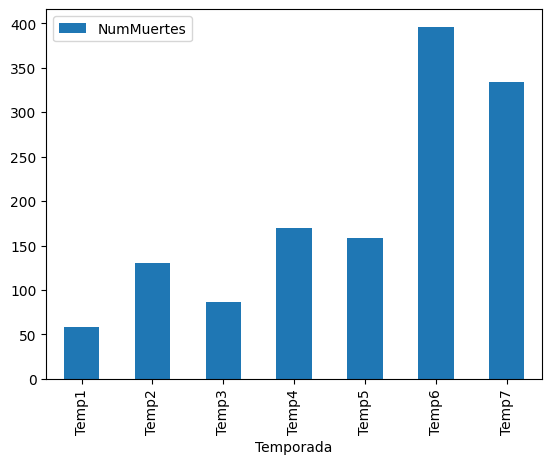

In [39]:
df_grafico=df_estadistico.groupby('Temporada').sum()
df_grafico.plot(kind="bar", y='NumMuertes')

Visualizar el número de muertes por temporadas de todas las temporadas. Obviamnete agrupar por temporadas

In [47]:
#df["season"].value_counts()
grupo_muertestemp=df.groupby('season')['method']
grupo_muertestemp.describe()

,count,unique,top,freq
season,,,,
1,58,19,Sword,30
2,130,23,Sword,33
3,86,14,Knife,29
4,170,25,Sword,52
5,158,20,Sword,51
6,396,17,Wildfire,197
7,334,18,Dragonfire (Dragon),182
8,892,14,Dragonfire (Dragon),773


Agrupamos un DATAFRAME por asesino

In [49]:
df_killer=df.groupby('killer').sum()
df_killer

,name,allegiance,season,episode,location,killers_house,method,death_no
killer,,,,,,,,
Accident,Baratheon of Dragonstone soldier,House Baratheon of Dragonstone,2,9,King's Landing,Unknown,Blunt object,120
Aemon Targaryen,Aemon Targaryen,Night's Watch,5,7,Castle Black,Night's Watch,Old Age,511
Alliser Thorne,WildlingThenn raiderWildling,Free FolkFree FolkFree Folk,12,27,Castle BlackCastle BlackCastle Black,Night's WatchNight's WatchNight's Watch,SwordSwordSword,1089
Amory Lorch,Yoren,Night's Watch,2,3,Riverlands,House Lannister,Sword,72
Arthur Dayne,Stark soldierStark soldierStark soldier,House StarkHouse StarkHouse Stark,18,9,DorneDorneDorne,House TargaryenHouse TargaryenHouse Targaryen,SwordSwordSword,1863
...,...,...,...,...,...,...,...,...
Wildling giant,Night's Watch brotherGrenn,Night's WatchNight's Watch,8,18,The WallCastle Black,Free FolkFree Folk,Giant arrowUnknown,760
Wun Wun,Night's Watch brotherBolton soldierBolton soldier,Night's WatchHouse BoltonHouse Bolton,18,20,Castle BlackWinterfellWinterfell,Free FolkFree FolkFree Folk,HandsHandsHands,2124
Yara Greyjoy,Bolton soldierBolton soldierBolton soldierGrey...,House BoltonHouse BoltonHouse BoltonHouse Grey...,68,34,DreadfortDreadfortDreadfortThe Narrow SeaThe N...,House GreyjoyHouse GreyjoyHouse GreyjoyHouse G...,AxeAxeAxeSwordSwordSwordSwordSwordSwordSwordSword,9482


Visualizar el asesino y el numero de muertes

In [ ]:
df_killer=df.groupby('killer')['death_no'].agg(['count'])
df_killer

,count
killer,
Accident,1
Aemon Targaryen,1
Alliser Thorne,3
Amory Lorch,1
Arthur Dayne,3
...,...
Wildling giant,2
Wun Wun,3
Yara Greyjoy,11


Mostrar un grafico de esta info (solo 10 1ros que aparezcan)

<Axes: ylabel='count'>

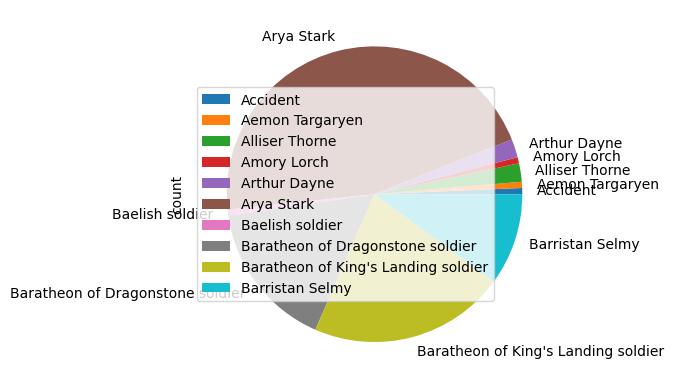

In [52]:
df_10killers=df_killer.head(10)
df_10killers.groupby('killer').sum().plot(kind='pie', y='count')

1. Queremos saber a cuantos a matado Daenerys (print)
2. Mostrar las muertes de Daenerys en un DATAFRAME
3. Mostrar las muertes de Daenerys por temporada
4. Mostrar su evolución por temporadas en un gráfico de barras

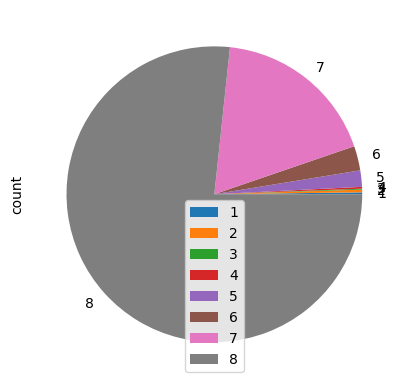

In [66]:
daenerys_muertos=df[df.killer=='Daenerys Targaryen']
daenerys_nummuertos=df[df.killer=='Daenerys Targaryen'].shape[0]
daenerys_muertostemp=daenerys_muertos.groupby('season')['death_no'].agg(['count']).plot(kind='pie', y='count')

